# L4. Numerical Integration and Differentiation

In this lecture, we will learn to compute integrals and derivatives numerically (i.e. by approximation instead of using the closed-form results from calculus). This is useful in many situations in economics:
- Expectations, which appear in most problems with a random/stochastic component, are integrals. We will learn how to compute these with quadrature rules and simulation below, with an example of a stochastic DP problem.
- You may need to integrate below a demand curve to obtain consumer surplus. 
- In some mechanism design problems, e.g. auctions, the agents' optimal strategies will involve an integral.
- Computing derivatives of a function is an essential step in many processes, such as optimization or zero-finding. Numerical differentiation can be integrated into the methods for optimization and zero-finding that we will learn in L6 and L7.
- In some cases, the derivative itself may be of interest. For example, we will look at obtaining the demand elasticity after you estimate demand non-parametrically, in which case the closed-form solution of the derivative could be unknown or hard to compute.

## 1. Numerical Integration
In this section, we will learn to numerically compute integrals of the form:
$$\int_a^b f(x) w(x) dx$$
for some non-negative weighting function $w(x)$. The weighting function could be just $w(x) \equiv 1$, or it could be the pdf of a random variable $X$ if we want to compute $E[f(X)]$.

### 1.1. Quadrature Rules
Quadrature rules approximate the integral by: $$\int_a^b f(x) w(x)dx \approx \sum_{i=1}^n \omega_i f(x_i)$$ for a set of $n$ *quadrature nodes* $x_i \in [a, b]$ and *quadrature weights* $\omega_i$. The goal of quadrature methods is to find a set of nodes and weights such that the approximation is good. Which of the methods below works best will depend on the form of $f(x)$ and $w(x)$.

#### 1.1.1. Newton-Cotes Formulas
The idea behind the Newton-Cotes formulas is to pick $n$ nodes, interpolate $f(x)$ with a piece-wise polynomial between those nodes, and then integrate under that interpolation. The simplest version of the method uses equally spaced nodes $x_i = a + (i - 1)h$ for $i = 1, \ldots, n$, where $h = (b - a)/(n - 1)$. In practice, the 3 most used rules are:

1. **Midpoint  rule** (piece-wise constant approximation): At each sub-interval $[x_i, x_{i+1}]$, compute the area of the rectangle of width $h$ and height $f(x_i + h/2)$: 
$$\int_a^b f(x) dx = \sum_{i=1}^n h \times f(x_i + h/2) + O(h^2)$$ 
The $O(h^2)$ term means that the approximation error is bounded by a $\text{const} \times h^2$ (this is the rate at which the error vanishes as $h \to 0$ or, equivalently $n \to \infty$.

2. **Trapezoid  rule** (piece-wise linear interpolation): For each interval $[x_i, x_{i+1}]$, interpolate linearly between the end-points, and then compute the area of the resulting trapezoid: 
$$\int_a^b f(x) dx = \frac{h}{2}[f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-1}) + f(x_n)] + O(h^2)$$

3. **Simpson's rule** (piece-wise cubic interpolation): For each three consecutive nodes, fit a quadratic polynomial that goes through end-points and mid-point, and then compute the area under that polynomial: 
$$\int_a^b f(x) dx =  \frac{h}{3}[f(x_1) + 4f(x_2) + 2f(x_3) + \cdots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n)] + O(h^4)$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/MidRiemann2.svg/1280px-MidRiemann2.svg.png" alt="Midpoint" width="400"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/TrapRiemann2.svg/1280px-TrapRiemann2.svg.png" alt="Trapezoid" width="400"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Simpsons_method_illustration.svg/1024px-Simpsons_method_illustration.svg.png" alt="Simpson's" width="400"/>

These methods are exact if the true function is truly piece-wise constant, linear or quadratic. Otherwise, the methods have quite a slow convergence rate, polynomial in the number of nodes $n$.

#### 1.1.2. Gaussian Formulas
Newton-Cotes formulas use arbitrarily chosen nodes, typically uniformly spaced in $[a,b]$. In contrast, Gaussian formulas are constructed by choosing the nodes and weights efficiently, so as to to make the approximation of $f$ a "good" one. The idea is to find a family of orthonormal polynomials with respect to the weighting function $w(x)$, and let $x_1, \ldots, x_n$ be the zeros of the corresponding degree-$n$ polynomial.

1. **Gauss-Chebyshev quadrature**: the weighting function is $w(x) = (1 - x^2)^{-1/2}$, and the family of orthonormal polynomials are the Chebyshev polynomials (the same ones we used for interpolation in L3). In that case:
$$\int_{-1}^1 f(x)(1 - x^2)^{-1/2}dx = \sum_{i=1}^n \frac{\pi}{n} f(x_i) + O([2^{2n-1}(2n)!]^{-1})$$

    This method can be adapted to compute integrals over $[a,b]$ by the appropriate change of variables: $y = a + (x+1)(b-a)/2$, $dy = dx(b-a)/2$. We can even compute integrals without the weighting function! For that, we make multiply and divide by $(1 - x^2)^{1/2}$, i.e.:

$$\int_a^b f(y)dy = \int_{-1}^1 f\left(a + \frac{(x+1)(b-a)}{2}\right) \frac{(1 - x^2)^{1/2}}{(1 - x^2)^{1/2}} \frac{(b-a)dx}{2} \approx \sum_{i=1}^n \frac{\pi(b-a)}{2n} f\left(a + \frac{(x_i+1)(b-a)}{2}\right)(1 - x_i^2)^{1/2}$$

2. **Gauss-Legendre quadrature**: for the constant weighting function $w(x) \equiv 1$, using Legendre polynomials and for some known weights $\omega_i$:
$$\int_{-1}^1 f(x)dx = \sum_{i=1}^n \omega_i f(x_i) + O(4^{-n})$$

    Again, this method can be adapted to compute general integrals over $[a,b]$ by the same change of variables as before.

3. **Gauss-Hermite quadrature**: the weighting function is $w(x) = e^{-x^2}$ (so these are particularly helpful for expectations of functions of normal random variables), using Hermite polynomials and for some known weights $\omega_i$:
$$\int_{-\infty}^\infty f(x) e^{-x^2}dx = \sum_{i=1}^n \omega_i f(x_i) + O(n![2^n (2n)!]^{-1})$$

    Notice that if we want to compute an expectation for $Y \sim N(\mu, \sigma^2)$:
    $$E[f(Y)] = (2\pi\sigma^2)^{-1/2} \int_{-\infty}^\infty f(y)e^{-(y-\mu)^2/2\sigma^2}dy$$ 
    we need to do the change of variables $x = (y-\mu)/\sqrt{2}\sigma$ (example to follow in the DP setting).

4. **Gauss-Laguerre quadrature**: the weighting function is $w(x) = e^{-x}$ (these are useful for infinite time-horizon problems in continuous time with exponential discounting), using Laguerre polynomials and for some known weights $\omega_i$:
$$\int_{0}^\infty f(x) e^{-x}dx = \sum_{i=1}^n \omega_i f(x_i) + O((n!)^2[(2n)!]^{-1})$$

    Again, the appropriate change of variables can be performed if needed.

By the [Fundamental Theorem of Gaussian Quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature#Fundamental_theorem), all of these methods are exact when $f(x)$ is a polynomial of degree at most $2n - 1$. Moreover, for other classes of smooth functions, the errors decaying exponentially in $n$, which will generally be much faster than the polynomial decay of the Newton-Coates formulas.

Let's see how to do them in Julia using the package ```FastGaussQuadrature```:

In [1]:
using FastGaussQuadrature, LinearAlgebra

f(x) = x^(-1/2) 

#= 
I picked this function because it has a singularity at 0! 
Its integral between 0 and 1 is known to be 2.
We will use Gauss-Legendre, since w(x) = 1.
The package FastGaussQuadrature gives you the nodes and weights,
then you have to compute the sum.
=#

for n in [5, 10, 50, 100]
    x, ω = gausslegendre(n)
    I = dot(ω, f.((x .+ 1.0)./2.0) .* 1.0./2.0) 
    # Remember the change of variables
    # y = a + (x+1)(b-a)/2 = (x+1)/2, 
    # dy = dx(b-a)/2 = dx/2
    @show I
end

I = 1.8415998803511693
I = 1.9170639420088411
I = 1.9827584931975117
I = 1.9913364016175987


Another package for computing numerical 1D integrals in Julia is ```QuadGK```, which uses an adaptive Gauss-Kronrod quadrature algorithm. This is a slightly more complicated procedure: $$\sum_{i=1}^n \omega_i f(x_i) + \sum_{i=1}^{n+1} \beta_i f(\xi_i)$$ The $x_1, \ldots, x_n$ nodes in the Gauss quadrature formula are extended with $n+1$ zeros of the Stieltjes polynomials. What is interesting about this method is that the comparison with simple Gauss quadrature provides an estimate of the error. The algorithm can be repeated efficiently with a larger set of data points to obtain higher accuracy, until the error is below some pre-specified level.

In [2]:
using QuadGK

@show quadgk(f, 0.0, 1.0);

quadgk(f, 0.0, 1.0) = (1.9999999845983916, 2.3762511924588553e-8)


#### 1.1.3. Note: Multidimensional Quadrature
These methods can be extended to multiple dimensions by the product rule:
$$\sum_{i_1 = 1}^n \cdots \sum_{i_d = 1}^n \omega_{i_1}^1 \omega_{i_2}^1 \cdots \omega_{i_d}^1 f(x_{i_1}, x_{i_2}, \cdots, x_{i_d})$$
The problem is that this requires evaluating the function at $n^d$ points (which grows exponentially as $d$ increases, making it prohibitively costly to compute). This is known as the "curse of dimensionality."

### 1.2. Monte Carlo Integration
In many cases, the integrals we want to compute take the form:
$$E_{X \sim p}[f(X)] = \int f(x) p(x) dx$$ 
for some density function $p(x)$. 

This suggests another way to compute integrals. Instead of using fixed gridpoints $x_1, \ldots, x_n$, we could draw i.i.d. random numbers $X_1, \ldots, X_n$ from $p$ and estimate the average: $$\int f(x) p(x) dx \approx \frac{1}{n}\sum_{i=1}^n f(X_i).$$ 

We know that this is unbiased estimator of the integral and, by the LLN, it converges almost surely to the value of the integral. Since this is a random quantity, it is always good to report the standard error $\widehat{\sigma}/\sqrt{n}$, where $$\widehat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n f(X_i)^2 - \left(\frac{1}{n}\sum_{i=1}^n f(X_i)\right)^2,$$ as a measure of precision/uncertainty.

#### 1.2.1. Drawing from a uniform distribution 
Drawing from a $U[0,1]$ can be useful in two situations:
1. In some cases we may want to estimate unweighted integrals, as in: $$\int_a^b f(y) dy = (b-a) \int_0^1 f(a + (b-a)x) dx \approx (b-a) \frac{1}{n}\sum_{i=1}^n f(a + (b-a)X_i),$$ where $X_i \sim U[0,1]$.

2. In some cases, it may be difficult to sample directly from $p(x)$, but we know its CDF $F(x)$ and we can compute $F^{-1}(x)$ easily. In that case, by a change of variables:
$$\int f(y) p(y) dy = \int_0^1 f(F^{-1}(x)) \frac{p(F^{-1}(x))}{p(F^{-1}(x))}dx \approx \frac{1}{n}\sum_{i=1}^nf(F^{-1}(X_i)),$$ where $X_i \sim U[0,1]$. So, if the first random draw is, say, .2, I take the .2-quantile of $F$, and so on.

    In practice, the package ```Distributions``` in Julia allows you to sample from most distributions you may need in practice (it does the CDF inverting for you), so that you don't have to worry about this manually. It is useful to know about it for custom applications, though, e.g., if you want to use a CDF that you estimated from a dataset.

#### 1.2.2. Importance Sampling
The naïve algorithm above is unbiased, but in some cases it will have high variance. Importance sampling is a way to reduce the variance while still keeping unbiasedness. The idea is to draw points from a different distribution $q$, and compute the re-weighted average $$\frac{1}{n}\sum_{i=1}^n f(X_i) \frac{p(X_i)}{q(X_i)}.$$ Notice that this is still unbiased:
$$E_{X \sim q}\left[f(X) \frac{p(X)}{q(X)}\right] = \int f(x) \frac{p(x)}{q(x)} q(x) \mathrm{d}x = \int f(x) p(x) \mathrm{d}x = E_{X \sim p}[f(X)].$$

The choice of $q$ is important both in order to achieve the reduction in variance and to possibly improve on the runtime of the algorithm. The basic idea is: (a) you want to put higher weight where $f(x)$ is large and (b) you want a distribution that is easy to sample from. See the Ackerberg (2009) paper cited at the end of the lecture notes for more on importance sampling, and its usefulness for simulation methods in economics.

#### 1.2.3. Accept/Reject (or Rejection) Sampling
The idea here is to sample a proposal from a proxy distribution (e.g. Gaussian) $q(x)$ and use another random draw from a uniform distribution to decide whether to accept the proposal or not as a draw from the distribution of interest $p(x)$. To apply this method, we need to know a finite $L > 1$ such that $\sup_x p(x)/q(x) \leq L$.

The method works as follows:
1. Generate a random draw $x$ from $q(x)$ (called the _proposal_ point)
2. Generate an (independent) random draw $u$ from a $U[0,L]$
3. If $u \leq p(x)/q(x)$, then the point $x$ is accepted. Otherwise, repeat the process

These steps are repeated until we obtain a sample of $n$ accepted points. You can show that, conditional on being accepted, $x$ is distributed according to $p(x)$. (Hint: use the fact that $\Pr(u \leq p(x)/q(x) \mid x) = (1/L) p(x)/q(x)$.)

Accept/reject sampling can be practical sometimes, for example when drawing from a conditional distribution of the form $p(X \mid X \in A)$ when $p$ belongs to the natural exponential family of probability distributions (e.g. a truncated normal).

#### 1.2.4 Markov Chain Monte-Carlo (MCMC)
These are are a collection of different methods based on sampling from a Markov chain that has the target distribution as its long-run equilibrium distribution (see the Gelman et al., 2013, reference for more on MCMC methods). The more steps that are included, the closer the distribution of the samples will be to the target, and theory has been worked out to guarantee the weak-dependence properties that we need to apply a LLN to the Markov chain. 

One of the most common MCMC methods is the **Metropolis-Hastings algorithm**, which is very similar to accept/reject sampling. Instead of sampling i.i.d. draws from a proxy distribution, however, the proposal points at each step are sampled from a distribution that conditions on the previous step, i.e., at step $t$:
1. Generate a random draw $x$ from a conditional distribution $q(x \mid x_{t-1})$
2. Generate an (independent) random draw $u$ from a $U[0,1]$
3. If $u \leq p(x)/p(x_{t-1})$, then the point $x$ is accepted and we set $x_t = x$. Otherwise, the point is rejected and we set $x_t = x_{t-1}$

Notice that this has the advantage of not requiring knowledge of the upper bound $L$ in accept/reject sampling.

A special case of a Metropolis-Hastings algorithm is **Gibbs sampling**, which is useful when we want to draw from multivariate distributions (i.e. draw a random vector whose components are not independent) $p(x_1, \ldots, x_d)$, and the conditional distributions $p(x_j | x_{1}, \ldots, x_{j-1}, x_{j+1}, \ldots, x_d)$ are easier to sample from than the joint distribution. 

Gibbs sampling starts with an initial value $(x^0_1, \ldots, x^0_d)$ and then, at each step $t$, the $j$-th component $x_j^t$ is drawn sequentally from $p(x_j^t \mid x_1^t, \ldots, x_{j-1}^t, x_{j+1}^{t-1}, \ldots, x_{d}^{t-1})$. Notice that we are conditioning on the new draws for $i < j$ and the previous draws for $i > j$.


Let's see how the simpler Monte-Carlo methods work with the example above:

In [3]:
using Random, Distributions, Statistics

Random.seed!(1)

N_sim = 100000

X_unif = rand(N_sim)

@show mean(f.(X_unif)), std(f.(X_unif))/sqrt(N_sim)

X_triang = rand(TriangularDist(0, 1, 0), N_sim)
g(x) = f(x)/pdf(TriangularDist(0, 1, 0), x)
    
@show mean(g.(X_triang)), 
      std(g.(X_triang))/sqrt(N_sim);

(mean(f.(X_unif)), std(f.(X_unif)) / sqrt(N_sim)) = (1.9890866284586879, 0.008870212336961376)
(mean(g.(X_triang)), std(g.(X_triang)) / sqrt(N_sim)) = (2.002127592042988, 0.007682469094315661)


### 1.3. Application: Cake-Eating Problem with Shocks
Consider the same setting as last lecture, with a modification:
\begin{align}
V^*(x, z) = \max_{\{c_t\}_{t=0}^\infty} & E_0 \sum_{t=0}^\infty \beta^t \log (c_t) \\
\text{subj. to } & 0 \leq c_t \leq x_t \\ & x_{t+1} = e^{z_{t+1}} (x_t - c_t) \\
& z_{t+1} = \rho z_t + \epsilon_{t+1}, \quad \epsilon_{t} \sim \text{i.i.d. } N(0, \sigma^2) \\
& x_0 = x, z_0 = z
\end{align}

*Question*: What is the economic interpretation of the shock?

The Bellman equation is now:
$$V^*(x, z) = \max_{0 \leq c \leq x}\{u(c) + \beta E_{z'}[V^*(e^{z'}(x - c), z') | z]\}$$ 

It can be shown, again, that the following is a solution:
$$V^*(x, z) = \frac{\beta\rho z}{(1 - \beta)(1 - \beta\rho)} + \frac{\log(x)}{1 - \beta} + \frac{\log(1-\beta)}{1-\beta} + \frac{\beta \log(\beta)}{(1-\beta)^2} \quad \text{and} \quad c^*(x, z) = (1 - \beta)x$$

Let's try and find it numerically, where we will use Monte Carlo integration to compute the expectation inside the Bellman equation (together with the interpolation techniques we learnt last week).

In [5]:
using Optim, LinearAlgebra, BasicInterpolators

u(c) = log(c)
err = randn(100) # Draw simulations only once for speed & convergence

# RHS of the Bellman eq.
function Bellman_MC_RHS(x_grid::AbstractRange{Float64}, z_grid::AbstractRange{Float64}, v_grid::Matrix{Float64}; β = 0.9, ρ = 0.5, σ = 0.1, err = err) # Fix the value of the current z (we'll only do it for a few z's)
    # Input:
    # x_grid = range(xmin, xmax, length) : a grid for the x values
    # z_grid = range(xmin, xmax, length) : a grid for the z values
    # v_grid : the corresponding grid for V(x,z) values
    
    # Output:
    # v_next : the RHS of the Bellman eq. for each x on the grid
    # c_max : the policy function for each x on the grid corresponding to v_grid
    
    # Initialize empty vectors to store the results
    v_next = zero(v_grid)
    c_max = zero(v_grid)
    
    # Interpolate
    # We use a bilinear interpolator because our value function depends on x and z now!
    lin_int = BilinearInterpolator(x_grid, z_grid, v_grid, NoBoundaries()) # NoBoundaries allows for extrapolation
                                                                           # Should be small in our case, since the variance of e is small
    mean_lin_int(x,z,c) = mean(lin_int(exp(ρ*z+σ*e)*(x-c),ρ*z+σ*e) for e in err)
    
    for (i,x) in enumerate(x_grid)
        for (j,z) in enumerate(z_grid)
            opt = optimize(c -> -u(c+1e-10) -β*mean_lin_int(x-1e-10,z,c), x_grid[1], x) 
            # optimize does minimization, hence (-1)*objective
            c_max[i,j] = Optim.minimizer(opt)
            v_next[i,j] = -Optim.minimum(opt)
        end
    end
    return v_next, c_max
end

# Solve Bellman eq. by iteration
function Bellman_MC(x_grid::AbstractRange{Float64}, z_grid::AbstractRange{Float64}; β = 0.9, ρ = 0.5, σ = 0.1, err = err, tol = 1e-10)
    # Input:
    # x_grid = range(xmin, xmax, length) : a grid for the x values
    # z_grid = range(xmin, xmax, length) : a grid for the z values
    
    # Output:
    # v_star : the value function for each x on the grid
    # c_max : the policy function for each x on the grid
    
    # Initialize empty vectors to store the results
    v_grid = zeros(Float64, length(x_grid), length(z_grid))
    v_next = zero(v_grid)
    c_max = zero(v_grid)
    
    error = 1000.0

    while error > tol
        v_next, c_max = Bellman_MC_RHS(x_grid, z_grid, v_grid; β, ρ, σ, err)
        error = maximum(abs.(v_next .- v_grid))
        v_grid = v_next
    end
    
    return v_next, c_max
end

x0 = 10

x_lin_grid = range(1e-2, x0, 50)
z_lin_grid = range(-0.5, 0.5, 21);

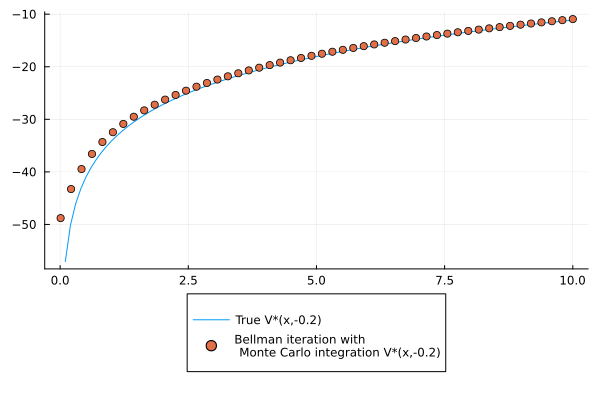

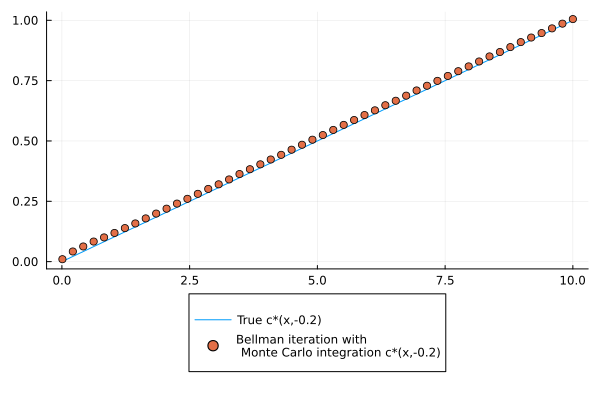

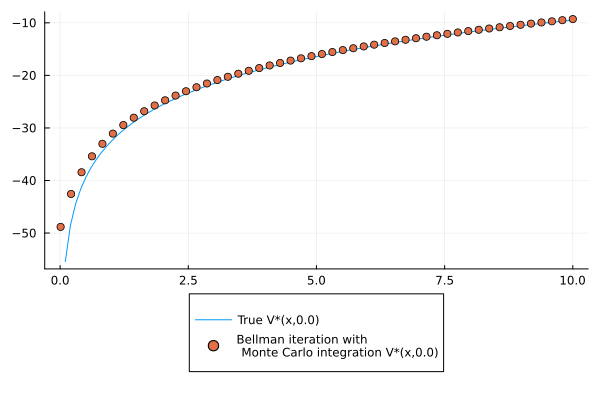

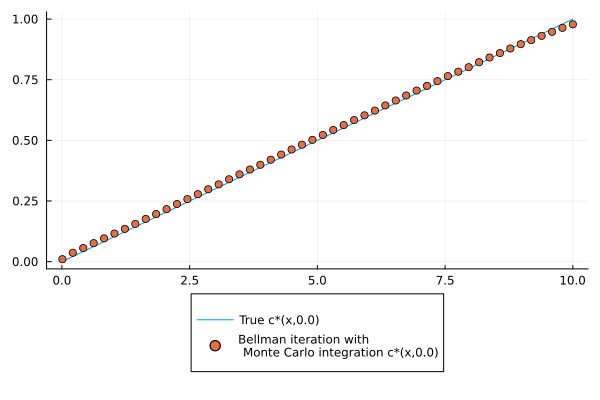

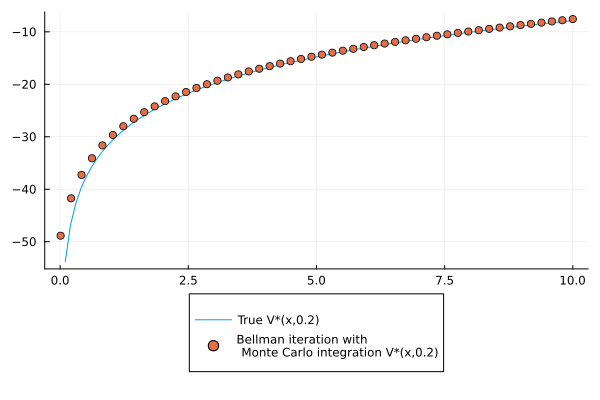

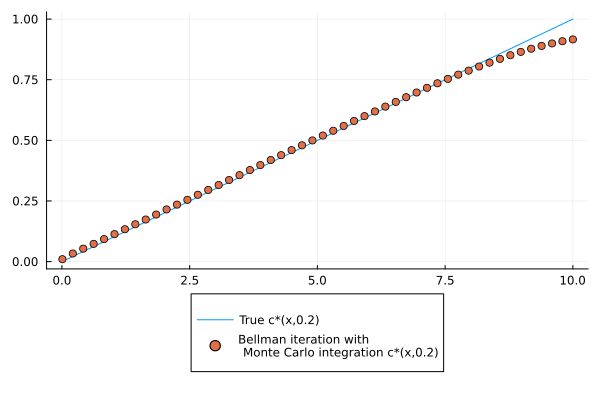

In [6]:
using Plots

plot_grid = range(0.0, x0, length=100) # Finer grid for plot
V_true(x, z; β = 0.9, ρ = 0.5) = β*ρ*z/((1.0 - β*ρ)*(1.0 - β)) + log(x)/(1.0 - β) + log(1.0 - β)/(1.0 - β) + β*log(β) / (1.0 - β)^2
c_true(x, z; β = 0.9) = (1.0 - β) * x

v_MC, c_MC = Bellman_MC(x_lin_grid, z_lin_grid);

for ind in [7, 11, 15]
    z = z_lin_grid[ind]
    
    gr()
    plot(plot_grid, V_true.(plot_grid, (z,)), label = "True V*(x,$z)", legend = :outerbottom)
    display(plot!(scatter!(x_lin_grid, v_MC[:, ind], label = "Bellman iteration with \n Monte Carlo integration V*(x,$z)")))

    gr()
    plot(plot_grid, c_true.(plot_grid, (z,)), label = "True c*(x,$z)", legend = :outerbottom)
    display(plot!(scatter!(x_lin_grid, c_MC[:, ind], label = "Bellman iteration with \n Monte Carlo integration c*(x,$z)")))
end

In [7]:
e, ω = gausshermite(100)

# RHS of the Bellman eq.
function Bellman_gauss_RHS(x_grid::AbstractRange{Float64}, z_grid::AbstractRange{Float64}, v_grid::Matrix{Float64}; β = 0.9, ρ = 0.5, σ = 0.1, err = err) # Fix the value of the current z (we'll only do it for a few z's)
    # Input:
    # x_grid = range(xmin, xmax, length) : a grid for the x values
    # z_grid = range(xmin, xmax, length) : a grid for the z values
    # v_grid : the corresponding grid for V(x) values
    
    # Output:
    # v_next : the RHS of the Bellman eq. for each x on the grid
    # c_max : the policy function for each x on the grid corresponding to v_grid
    
    # Initialize empty vectors to store the results
    v_next = zero(v_grid)
    c_max = zero(v_grid)
    
    # Interpolate
    lin_int = BilinearInterpolator(x_grid, z_grid, v_grid, NoBoundaries()) # NoBoundaries allows for extrapolation
                                                                           # Should be small in our case, since the variance of e is small
    
    # Remember the change of variables for Gauss-Hermite quadrature:
    # Gauss-Hermite is for the integral of f(x) * e^(-x^2) dx
    # But if Y ∼ N(μ, σ^2), E[f(Y)] is the integral of f(y) * e^(-(y-μ)^2/(2*σ^2)) / sqrt(2πσ^2) dy
    # Hence we change variables:
    # x = (y-μ)/(sqrt(2)*σ), dx = dy/(sqrt(2)*σ), y = μ + sqrt(2)*σ*x
    
    # Below we compute E[V(exp(z') * (x - c), z') | z], doing this change of variables
    # In our case, the old variable is z'. Given z, z' is distributed N(ρ*z, σ^2)
    # We change it for the variable e below (y in the general notation above)
    
    mean_lin_int(x,z,c) = dot(ω, lin_int.(exp.(ρ*z.+sqrt(2)*σ*e)*(x-c), ρ*z.+sqrt(2)*σ*e))*π^(-1/2)
    
    for (i,x) in enumerate(x_grid)
        for (j,z) in enumerate(z_grid)
            opt = optimize(c -> -u(c+1e-10) -β*mean_lin_int(x-1e-10,z,c), x_grid[1], x) 
            # optimize does minimization, hence (-1)*objective
            c_max[i,j] = Optim.minimizer(opt)
            v_next[i,j] = -Optim.minimum(opt)
        end
    end
    return v_next, c_max
end

# Solve Bellman eq. by iteration
function Bellman_gauss(x_grid::AbstractRange{Float64}, z_grid::AbstractRange{Float64}; β = 0.9, ρ = 0.5, σ = 0.1, err = err, tol = 1e-10)
    # Input:
    # x_grid = range(xmin, xmax, length) : a grid for the x values
    # z_grid = range(xmin, xmax, length) : a grid for the z values
    
    # Output:
    # v_star : the value function for each x on the grid
    # c_max : the policy function for each x on the grid
    
    # Initialize empty vectors to store the results
    v_grid = zeros(Float64, length(x_grid), length(z_grid))
    v_next = zero(v_grid)
    c_max = zero(v_grid)
    
    error = 1000.0

    while error > tol
        v_next, c_max = Bellman_gauss_RHS(x_grid, z_grid, v_grid; β, ρ, σ, err)
        error = maximum(abs.(v_next .- v_grid))
        v_grid = v_next
    end
    
    return v_next, c_max
end;

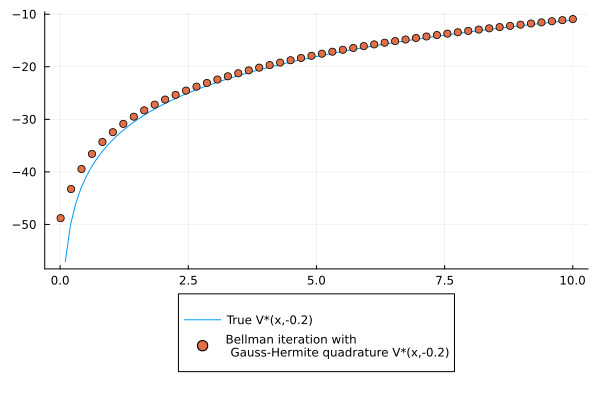

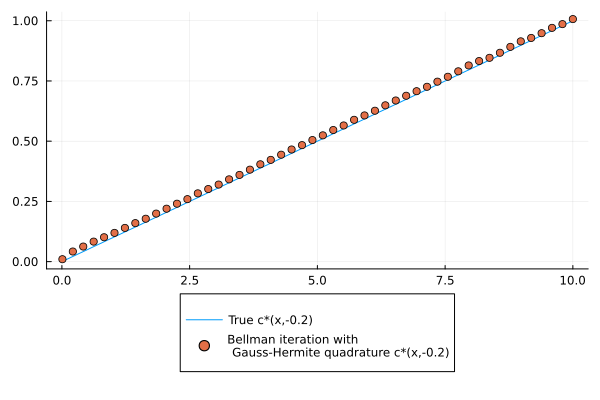

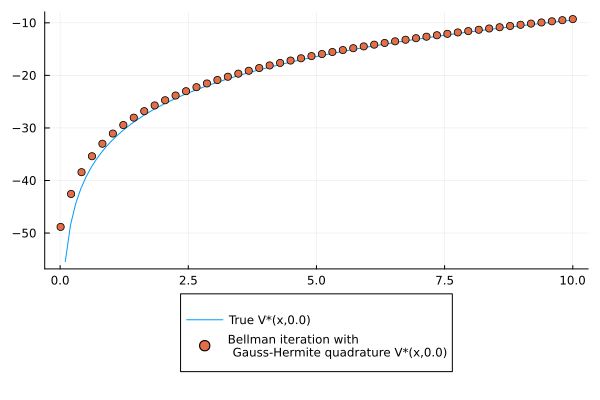

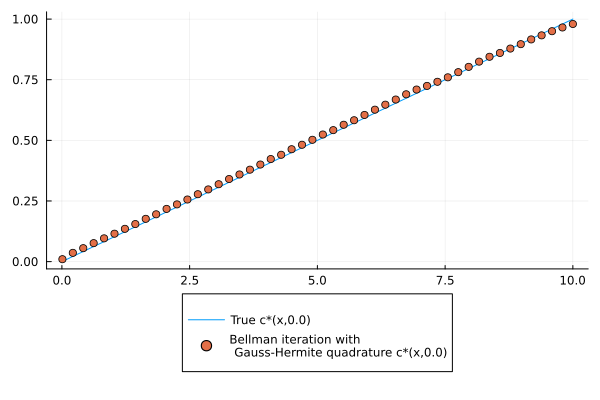

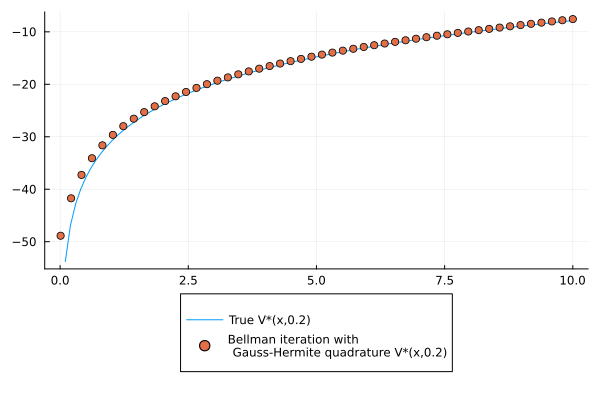

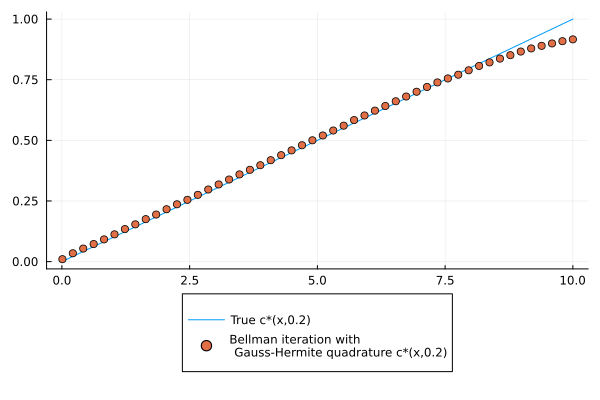

In [8]:
v_gauss, c_gauss = Bellman_gauss(x_lin_grid, z_lin_grid);

for ind in [7, 11, 15]
    z = z_lin_grid[ind]
    
    gr()
    plot(plot_grid, V_true.(plot_grid, (z,)), label = "True V*(x,$z)", legend = :outerbottom)
    display(plot!(scatter!(x_lin_grid, v_gauss[:, ind], label = "Bellman iteration with \n Gauss-Hermite quadrature V*(x,$z)")))

    gr()
    plot(plot_grid, c_true.(plot_grid, (z,)), label = "True c*(x,$z)", legend = :outerbottom)
    display(plot!(scatter!(x_lin_grid, c_gauss[:, ind], label = "Bellman iteration with \n Gauss-Hermite quadrature c*(x,$z)")))
end

## 2. Numerical Differentiation
Now, we turn to computing derivatives numerically.

### 2.1. Finite Differences
Recall the definition of the derivative: $$f'(x) = \lim_{\epsilon \to 0} \frac{f(x + \epsilon) - f(x)}{\epsilon} = \lim_{\epsilon \to 0} \frac{f(x) - f(x - \epsilon)}{\epsilon}$$

The definition suggests two ways of approximating derivatives numerically:
1. **Forward-differencing**: $$f'(x) = \frac{f(x+h) - f(x)}{h} + O(h)$$
2. **Backward-differencing**: $$f'(x) = \frac{f(x) - f(x-h)}{h} + O(h)$$
where $h > 0$ is a small number.

**Trade-off 1: Accuracy vs. Numerical Stability** Theoretically, we want to pick the smallest $h$ possible to minimize the aproximation error. In practice, however, computers have a limit on the precision to which they can distinguish very close numbers, so picking an $h$ that is too small could lead to numerical instabilities:

In [9]:
@show ϵ = eps(1.0) # The "machine epsilon": eps(x) gives you the maximum ϵ such that x and x + ϵ are distinguishable
@show 1.0 == 1.0 + ϵ/2;

ϵ = eps(1.0) = 2.220446049250313e-16
1.0 == 1.0 + ϵ / 2 = true


Packages in Julia choose the step size $h$ automatically (if you're curious, the optimal step-size for forward or backward differencing is $h = \max\{1, |x|\} \sqrt{\varepsilon}$ where $\varepsilon$ is the machine epsilon).

You may ask: are there other ways to approximate the derivative that yield smaller approximation error? The answer is yes:
1. **Centered-differencing**: $$f'(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^2)$$
1. **Richardson's extrapolation**: $$f'(x) = \frac{-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x-2h)}{12h} + O(h^4)$$

**Trade-off 2: Accuracy vs. Computational Efficiency**  We have seen that some methods exist that get a smaller approximation error, but those methods require you to evaluate the function at more points.

The trade-off becomes worse in larger dimensions. Suppose you want to approximate the gradient of a function of two variables. With forward-differencing you could do it as: 
$$\nabla f(x_1, x_2) \approx \left[\frac{f(x_1+h_1, x_2) - f(x_1, x_2)}{h_1}, \frac{f(x_1, x_2+h_2) - f(x_1, x_2)}{h_2}\right],$$ which requires 3 function evaluations. In contrast, Richardson's extrapolation: 
$$\nabla f(x_1, x_2) \approx \left[\frac{-f(x_1+2h_1, x_2) + 8f(x_1+h_1, x_2) - 8f(x_1-h_1, x_2) + f(x_1-2h_1, x_2)}{12h_1}, \frac{-f(x_1, x_2+2h_2) + 8f(x_1, x_2+h_2) - 8f(x_1, x_2-h_2) + f(x_1, x_2-2h_2)}{12h_2}\right]$$ would require 8 function evaluations.

### 2.2. Automatic Differentiation
**Automatic Differentiation** refers to implementing the chain rule numerically. Recall the chain rule:
$$\frac{dy}{dx} = \frac{dy}{dw} \cdot \frac{dw}{dx}$$

There are mostly two ways to automatically differentiate a function:
#### 2.2.1. Forward-mode AD 
(Don't confuse this with forward-differenting).

You work from left to right in the expression above. This is the one that is better implemented in Julia, and it is, for example, what ```FiniteDiff``` does. It is especially efficient for finding Jacobian matrices (where the output dimension is similar to or larger than the input dimension). Let's see how it works with an example.

Suppose we have:
$$f(x_1, x_2) = x_1 x_2 + \sin(x_1) =: w_1 + w_2 =: w_3.$$ 

By the chain rule, for any variable $t$,
\begin{align*}
\frac{\partial w_3}{\partial t} & = \frac{\partial w_3}{\partial w_1} \cdot \frac{\partial w_1}{\partial t} + \frac{\partial w_3}{\partial w_2} \cdot \frac{\partial w_3}{\partial t}, \\
\frac{\partial w_1}{\partial t} & = \frac{\partial w_1}{\partial x_1} \cdot \frac{\partial x_1}{\partial t} + \frac{\partial w_1}{\partial x_2} \cdot \frac{\partial x_2}{\partial t}, \\
\frac{\partial w_2}{\partial t} & = \frac{\partial w_2}{\partial x_1} \cdot \frac{\partial x_1}{\partial t} + \frac{\partial w_2}{\partial x_2} \cdot \frac{\partial x_2}{\partial t},
\end{align*}

A program that computes derivatives by forward-mode AD would work in this order:
```julia
dx1dt = ?
dx2dt = ?
dw1dt = dx1dt * x2 + x1 * dx2dt
dw2dt = cos(x1) * dx1dt
dw3dt = dw1dt + dw2dt
```
For example, to compute the partial derivative with respect to $x_1$, you would replace ```dx1dt = 1``` and ```dx2dt = 0``` above. 

Do you see why this is efficient for functions with (possibly) many outputs, but not many inputs? With just one pass of forward-mode AD, you can compute the partial derivative of many outputs with respect to one input, but if you want partial derivatives with respect to many inputs, you have to repeat the process many times.

#### 2.2.2. Reverse-mode AD 
You work from right to left in the expression above. This will sound strage at first, because we normally apply the chain rule in the opposite order! That is, for some variable $z$ which represents an *output*:
\begin{align*}
\frac{\partial w_3}{\partial x_1} & = \frac{\partial w_1}{\partial x_1} \cdot \frac{\partial w_3}{\partial w_1} + \frac{\partial w_2}{\partial x_1} \cdot \frac{\partial w_3}{\partial w_2}, \\
\frac{\partial w_3}{\partial x_2} & = \frac{\partial w_1}{\partial x_2} \cdot \frac{\partial w_3}{\partial w_1} + \frac{\partial w_2}{\partial x_2} \cdot \frac{\partial w_3}{\partial w_2}, \\
\frac{\partial w_3}{\partial w_1} & = \frac{\partial w_3}{\partial z} \cdot \frac{\partial z}{\partial w_1} \\
\frac{\partial w_3}{\partial w_2} & = \frac{\partial w_3}{\partial z} \cdot \frac{\partial z}{\partial w_2}
\end{align*}

A program that computes derivatives by backward-mode AD in the previous example would work in this order:
```julia
dw3dz = ?
dw3dw2 = dw3dz * 1.
dw3dw1 = dw3dz * 1.
dw3dy = x1 * dw3dw1
dw3dx = x2 * dw3dw1 + cos(x1) * dw3dw2
```
For partial derivatives with respect to output $z = w_3$, we would replace ```dw3dz = 1```.

Hence, with just one pass you are able to get the partial derivatives of one output with respect to many inputs, but to get the gradients with respect to many outputs, you would have to repeat this process many times. Reverse-mode AD is therefore especially efficient for finding gradients of scalar functions with many inputs. This explains its popularity in training machine learning methods, where you typically want to optimize a scalar loss function with respect to many parameters.

However, this is more difficult to implement in a computationally efficient way. There are different packages that do that in Julia, although all of them have caveats. One of those packages is ```ReverseDiff```, from the same library as ```ForwardDiff```. Another reverse-mode AD package, ```Zygote```, is popular among the Julia ML community (although it works pretty slowly if your function loops over the inputs, like in the example below). 

In [10]:
using ForwardDiff, ReverseDiff

f1(x) = [cos(i*x[1]) for i in range(0, 2π, 50)] # A function with one input and many outputs

x0 = [1.0]

ForwardDiff.jacobian(f1, x0)
@time ForwardDiff.jacobian(f1, x0)
ReverseDiff.jacobian(f1, x0)
@time ReverseDiff.jacobian(f1, x0); 

f2(x) = sum(x[i]*x[i+1]^2 for i in 1:1999) # A function with many inputs and one output

x0 = rand(2000)

ForwardDiff.gradient(f2, x0)
@time ForwardDiff.gradient(f2, x0)
ReverseDiff.gradient(f2, x0)
@time ReverseDiff.gradient(f2, x0);

  0.000014 seconds (5 allocations: 1.500 KiB)
  0.000086 seconds (461 allocations: 18.672 KiB)
  0.002850 seconds (5 allocations: 221.203 KiB)
  0.000658 seconds (28.00 k allocations: 1.263 MiB)


## Additional Resources
- Quantitative Economics with Julia: [Solvers, Optimizers, and Automatic Differentiation](https://julia.quantecon.org/more_julia/optimization_solver_packages.html)

- Fedor Iskhakov's Foundations of Computational Economics course: [Numerical Integration, Quadrature](https://github.com/fediskhakov/CompEcon/blob/main/34_integration.ipynb)

- Judd (1998) Chapter 7 and references therein.

- [NumericalIntegration.jl](https://juliahub.com/ui/Packages/NumericalIntegration/ICkqT/0.3.3): A package that does numerical integration with presampled data (meaning you can't choose arbitrary nodes), including Trapezoid and Simpson's rules.

- [A blog post](https://rufflewind.com/2016-12-30/reverse-mode-automatic-differentiation) that explains the difference between forward- and backward-mode AD more thoroughly.

- **On importance sampling:** Ackerberg, D.A (2009). "A new use of importance sampling to reduce computational burden in simulation estimation." _Quant Mark Econ_ 7, 343–376. https://doi.org/10.1007/s11129-009-9074-z

- **On Gibbs sampling and MCMC, along with other methods that have a Bayesian interpretation:** Gelman, A., Carlin, J.B., Stern, H.S., Dunson, D.B., Vehtari, A., & Rubin, D.B. (2013). _Bayesian Data Analysis_ (3rd ed.). Chapman and Hall/CRC. https://doi.org/10.1201/b16018